In [1]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import style
style.use("fivethirtyeight")

In [2]:
#Read the csv file into a DataFrame
df = pd.read_csv(r"https://query1.finance.yahoo.com/v7/finance/download/ETH-USD?period1=1510185600&period2=1715189757&interval=1d&events=history&includeAdjustedClose=true")

In [3]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
5,2017-11-14,316.763000,340.177002,316.763000,337.631012,337.631012,1069680000
6,2017-11-15,337.963989,340.911987,329.812988,333.356995,333.356995,722665984
7,2017-11-16,333.442993,336.158997,323.605988,330.924011,330.924011,797254016
8,2017-11-17,330.166992,334.963989,327.523010,332.394012,332.394012,621732992
9,2017-11-18,331.980011,349.615997,327.687012,347.612000,347.612000,649638976


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373 entries, 0 to 2372
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2373 non-null   object 
 1   Open       2373 non-null   float64
 2   High       2373 non-null   float64
 3   Low        2373 non-null   float64
 4   Close      2373 non-null   float64
 5   Adj Close  2373 non-null   float64
 6   Volume     2373 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 129.9+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2373.000000,2373.000000,2373.000000,2373.000000,2373.000000,2.373000e+03
mean,1333.170187,1370.841203,1291.647853,1334.113759,1334.113759,1.224939e+10
std,1164.733027,1197.444905,1127.558125,1164.690691,1164.690691,1.006466e+10
min,84.279694,85.342743,82.829887,84.308296,84.308296,6.217330e+08
25%,240.992004,245.972824,233.758667,240.984985,240.984985,5.035111e+09
50%,1193.254028,1223.517822,1141.159668,1195.126953,1195.126953,9.774452e+09
75%,1961.867554,2022.791504,1917.294067,1963.285034,1963.285034,1.678622e+10
max,4810.071289,4891.704590,4718.039063,4812.087402,4812.087402,8.448291e+10


In [6]:
#Make two new columns which will be used for making predictions.
df["HL_Perc"] = (df["High"]-df["Low"]) / df["Low"] * 100
df["CO_Perc"] = (df["Close"] - df["Open"]) / df["Open"] * 100

In [7]:
dates = np.array(df["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [8]:
df = df[["HL_Perc", "CO_Perc", "Adj Close", "Volume"]]

In [9]:
#Define the label column
df["PriceNextMonth"] = df["Adj Close"].shift(-30)

In [10]:
df.isnull().sum()

HL_Perc            0
CO_Perc            0
Adj Close          0
Volume             0
PriceNextMonth    30
dtype: int64

In [11]:
df.tail()

,HL_Perc,CO_Perc,Adj Close,Volume,PriceNextMonth
2368,2.301923,0.449694,3117.576416,8283229638,NaN
2369,3.071577,0.629068,3137.249023,8783447639,NaN
2370,5.639776,-2.383466,3062.728760,13008587255,NaN
2371,4.198037,-1.834097,3006.577148,11743187337,NaN
2372,1.878026,0.067739,3007.875000,11640911872,NaN


In [12]:
#Make fetaure and label arrays
X = np.array(df.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
df.dropna(inplace = True)
y = np.array(df["PriceNextMonth"])

C:\Users\kamalkant\AppData\Local\Temp\ipykernel_14508\1871459895.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(["PriceNextMonth"], 1))


In [13]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [14]:
#Define the prediction model
model = RandomForestRegressor()

In [15]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [16]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.9217005200899144


In [17]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [18]:
predictions = model.predict(X_Check)

In [19]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = df["Adj Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame
print(result)

            ClosePrice     Forecast
Date                               
2017-11-09  320.884003          NaN
2017-11-10  299.252991          NaN
2017-11-11  314.681000          NaN
2017-11-12  307.907990          NaN
2017-11-13  316.716003          NaN
...                ...          ...
2024-05-04         NaN  2665.279366
2024-05-05         NaN  2894.941631
2024-05-06         NaN  2719.009822
2024-05-07         NaN  2792.405360
2024-05-08         NaN  2671.695597

[2373 rows x 2 columns]


Text(0, 0.5, 'Price')

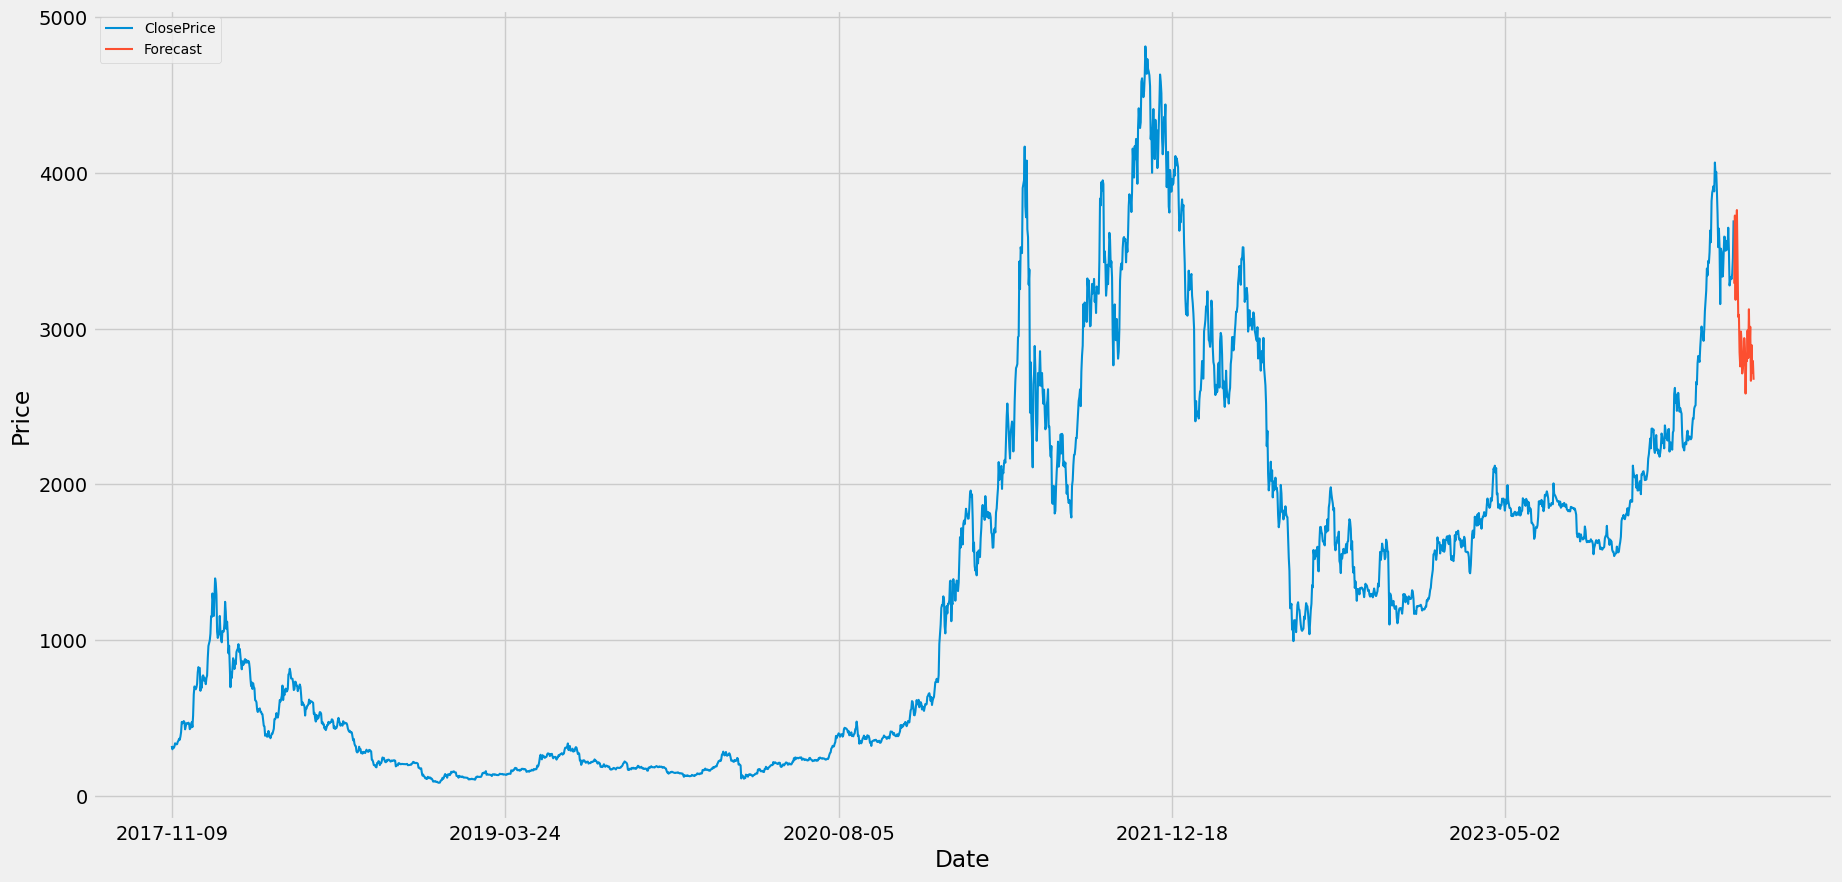

In [20]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':10})
plt.xlabel('Date')
plt.ylabel('Price')
